In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pytorch_lightning as pl

from neural_processes.data import gaussian_process as gp
from neural_processes import cnp

plt.style.use("seaborn")

In [2]:
encoder = cnp.Encoder(input_size=2, output_sizes=[128, 128, 128, 128])
decoder = cnp.Decoder(input_size=129, output_sizes=[128, 128, 128, 2])
train_loader = gp.torch.CurveGenerator(batch_size=64, max_num_context=20, testing=False)

In [3]:
def plot_test(net):
    test = gp.torch.CurveGenerator(batch_size=1, max_num_context=20, testing=True).generate_batch()
    context_x, context_y, target_x, target_y = test
    mu, sigma = net.forward(context_x, context_y, target_x)
    
    mu = mu.squeeze().detach()
    sigma = sigma.squeeze().detach()
    context_x = context_x.squeeze()
    context_y = context_y.squeeze()
    target_x = target_x.squeeze()
    target_y = target_y.squeeze()

    plt.scatter(target_x, target_y, s=10, color="grey", label="target", alpha=0.5)
    plt.scatter(context_x, context_y, s=20, color="tab:red", label="context")

    plt.plot(target_x, mu, linestyle="--", color="tab:blue", label="output mean")
    plt.fill_between(target_x, mu - sigma, mu + sigma, color="tab:blue", label="output std", alpha=0.2)
    plt.legend()
    plt.show()

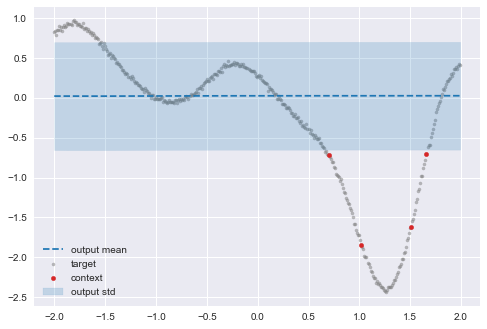

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name             | Type       | Params
--------------------------------------------
0  | encoder          | Encoder    | 49 K  
1  | encoder.initial  | Linear     | 384   
2  | encoder.hidden   | ModuleList | 33 K  
3  | encoder.hidden.0 | Linear     | 16 K  
4  | encoder.hidden.1 | Linear     | 16 K  
5  | encoder.final    | Linear     | 16 K  
6  | decoder          | Decoder    | 49 K  
7  | decoder.initial  | Linear     | 16 K  
8  | decoder.hidden   | ModuleList | 33 K  
9  | decoder.hidden.0 | Linear     | 16 K  
10 | decoder.hidden.1 | Linear     | 16 K  
11 | decoder.final    | Linear     | 258   


/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


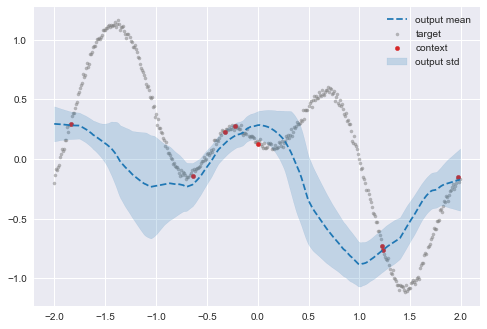

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name             | Type       | Params
--------------------------------------------
0  | encoder          | Encoder    | 49 K  
1  | encoder.initial  | Linear     | 384   
2  | encoder.hidden   | ModuleList | 33 K  
3  | encoder.hidden.0 | Linear     | 16 K  
4  | encoder.hidden.1 | Linear     | 16 K  
5  | encoder.final    | Linear     | 16 K  
6  | decoder          | Decoder    | 49 K  
7  | decoder.initial  | Linear     | 16 K  
8  | decoder.hidden   | ModuleList | 33 K  
9  | decoder.hidden.0 | Linear     | 16 K  
10 | decoder.hidden.1 | Linear     | 16 K  
11 | decoder.final    | Linear     | 258   


/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


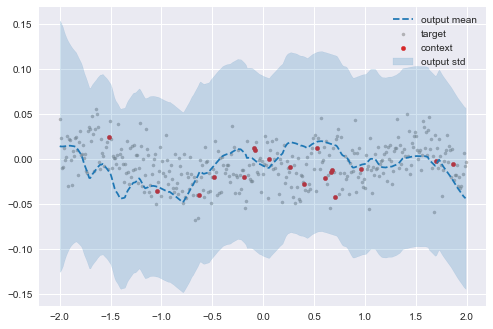

GPU available: False, used: False
No environment variable for node rank defined. Set as 0.

   | Name             | Type       | Params
--------------------------------------------
0  | encoder          | Encoder    | 49 K  
1  | encoder.initial  | Linear     | 384   
2  | encoder.hidden   | ModuleList | 33 K  
3  | encoder.hidden.0 | Linear     | 16 K  
4  | encoder.hidden.1 | Linear     | 16 K  
5  | encoder.final    | Linear     | 16 K  
6  | decoder          | Decoder    | 49 K  
7  | decoder.initial  | Linear     | 16 K  
8  | decoder.hidden   | ModuleList | 33 K  
9  | decoder.hidden.0 | Linear     | 16 K  
10 | decoder.hidden.1 | Linear     | 16 K  
11 | decoder.final    | Linear     | 258   


/Users/aliteeney/personal/neural_processes/.venv/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


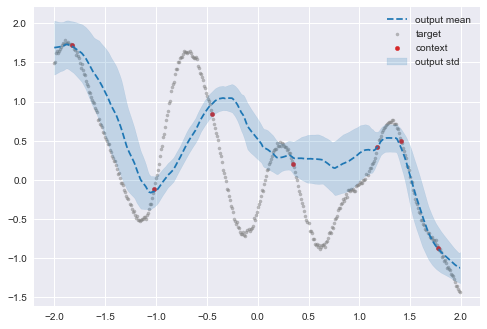

In [4]:
net = cnp.Model(encoder=encoder, decoder=decoder, train_loader=train_loader)
plot_test(net)

for _ in range(3):
    trainer = pl.Trainer(max_steps=10000)
    trainer.fit(net)

    plot_test(net)

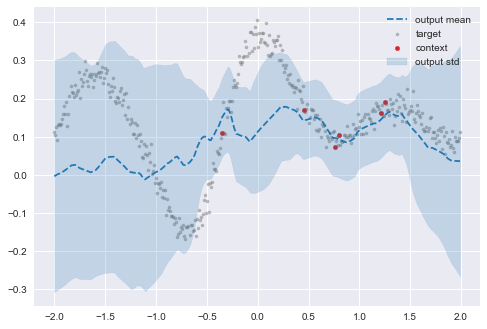

In [5]:
plot_test(net)